In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# Hyper-parameters initialization

IMAGE_SIZE = 28*28
NUM_CLASSES = 10
MAX_EPOCH = 5
BATCH_SIZE = 120
LEARNING_RATE = 0.005

In [23]:
class LogisticRegression(nn.Module):

    def __init__(self,input_size,num_classes):
        super(LogisticRegression, self).__init__()
        # 1 input image : 28*28 , output is 10 classes
        self.linear = nn.Linear(in_features=IMAGE_SIZE, out_features=NUM_CLASSES,bias=True)
        
    def forward(self, x):
        return self.linear(x)



In [24]:
#Download Fashion-MNIST dataset
ROOT = "data/"

#transforms.ToTensor() transforms the PIL.Image.Image format to pytorch Tensor 

train_Fashion_MINST = FashionMNIST(ROOT+"Fashion-MNIST", train=True, download=True,transform=transforms.ToTensor())
test_Fashion_MINST = FashionMNIST(ROOT+"Fashion-MNIST", train=False, download=True,transform=transforms.ToTensor())


train_data_loader = torch.utils.data.DataLoader(train_Fashion_MINST,batch_size=BATCH_SIZE,shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_Fashion_MINST,batch_size=BATCH_SIZE,shuffle=True)


In [25]:
#Before iterating all the training set, verfiy the dimensions of the training and target tensors of a random example
(images, labels) = list(train_data_loader)[0]
# images shape now is [BATCH_SIZE, 1, 28, 28], it should be reshaped ot [BATCH_SIZE,IMAGE_SIZE]
images = images.reshape(-1,IMAGE_SIZE)
print(images.shape)
print(labels.shape)
assert images.shape[0] == BATCH_SIZE
assert images.shape[1] == IMAGE_SIZE
assert labels.shape[0] == BATCH_SIZE


torch.Size([120, 784])
torch.Size([120])


In [32]:
lr_model = LogisticRegression(IMAGE_SIZE, NUM_CLASSES)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lr_model.parameters(), lr=LEARNING_RATE)

for epoch in range(0,MAX_EPOCH):
    
    running_loss = 0
    #train_data_loader is already partitioned to multiple batches, each batch with size = LENGTH(TRAINING_SET)/BATCH_SIZE
    for batch_index, (images, labels) in enumerate(train_data_loader):
        images = Variable(images.reshape(-1, IMAGE_SIZE),requires_grad=True)
        labels = Variable(labels)

        #reset the gradients to zero
        optimizer.zero_grad()
        
        #calculate predictions (y^)
        predictions = lr_model(images)
        
        #calculate Cross Entropy loss between labels(y) and predictions(y^)
        loss = criterion(predictions, labels)
        
        #Backward propagation
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if (batch_index + 1) % 500 == 0:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch, batch_index + 1, running_loss / 500))
            running_loss = 0.0

[0,   500] loss: 0.556
[1,   500] loss: 0.454
[2,   500] loss: 0.438
[3,   500] loss: 0.427
[4,   500] loss: 0.416


In [33]:
# Test the model accuracy
correct_instances = 0
total_test_examples = 0
for images, labels in test_data_loader:
    images = Variable(images.reshape(-1, IMAGE_SIZE))
    predictions_output = lr_model(images)
    _, predicted_classes = torch.max(predictions_output.data, 1)
    total_test_examples = total_test_examples + len(images)
    correct_instances = correct_instances + (predicted_classes == labels).sum()

print('Number of correct classified test images: %d %%' % (100 * correct_instances / total_test_examples))

Number of correct classified test images: 83 %


In [34]:
classes_names = {}
classes_names[0] = 'T-shirt/top'
classes_names[1] = 'Trouser'
classes_names[2] = 'Pullover'
classes_names[3] = 'Dress'
classes_names[4] = 'Coat'
classes_names[5] = 'Sandal'
classes_names[6] = 'Shirt'
classes_names[7] = 'Sneaker'
classes_names[8] = 'Bag'
classes_names[9] = 'Ankle boot'


In [68]:
def visualize_model(lr_model,dataloaders, num_images=12):
    was_training = lr_model.training
    lr_model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders):
            inputs = inputs.reshape(-1,IMAGE_SIZE)
            outputs = lr_model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//4, 4, images_so_far)
                ax.axis('off')
                ax.set_title('{}'.format(classes_names[int(preds[j])]))
                plt.subplots_adjust(hspace=0.6,wspace=0.6,)
                plt.imshow(inputs.reshape(-1,28,28).data[j])

                if images_so_far == num_images:
                    lr_model.train(mode=was_training)
                    return
        lr_model.train(mode=was_training)

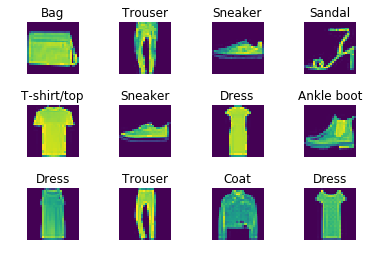

In [69]:
visualize_model(lr_model,train_data_loader)